### Performing EDA

#### Importing libraries

In [4]:
import pandas as pd
import numpy as np

#### Reding csv file

In [5]:
df = pd.read_csv('loan_approval_dataset.csv')

In [6]:
df.shape

(4269, 13)

In [7]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [10]:
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

#### There is no columns values with nan's

In [14]:
df.columns = df.columns.str.replace(' ', '')

In [15]:
df['no_of_dependents'].unique()

array([2, 0, 3, 5, 4, 1], dtype=int64)

In [16]:
df['education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [17]:
df['self_employed'].unique()

array([' No', ' Yes'], dtype=object)

In [20]:
df['loan_term'].unique()

array([12,  8, 20, 10,  4,  2, 18, 16, 14,  6], dtype=int64)

In [30]:
#Creating new columns total assets
df['total_assets'] = df['residential_assets_value']+df['commercial_assets_value']+df['luxury_assets_value']+df['bank_asset_value']

#### Identifying the non intiger columns

In [36]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col)

education
self_employed
loan_status


In [38]:
df['education'] = df['education'].str.replace(' ', '', regex=False)

In [39]:
df['education'].unique()

array(['Graduate', 'NotGraduate'], dtype=object)

In [40]:
df['education_int'] = df['education'].replace({'Graduate':1,'NotGraduate':0})

C:\Users\ramac\AppData\Local\Temp\ipykernel_10636\3846350509.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['education_int'] = df['education'].replace({'Graduate':1,'NotGraduate':0})


In [43]:
df['self_employed'] = df['self_employed'].str.replace(' ', '', regex=False)

In [47]:
df['self_employed_int'] = df['self_employed'].replace({'Yes': 1, 'No': 0}).astype(int)

C:\Users\ramac\AppData\Local\Temp\ipykernel_10636\253428245.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['self_employed_int'] = df['self_employed'].replace({'Yes': 1, 'No': 0}).astype(int)


In [48]:
df['loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [49]:
df['loan_status'] = df['loan_status'].str.replace(' ', '', regex=False)

In [51]:
df['loan_status_int'] = df['loan_status'].replace({'Approved':1,'Rejected':0})

C:\Users\ramac\AppData\Local\Temp\ipykernel_10636\2142027499.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['loan_status_int'] = df['loan_status'].replace({'Approved':1,'Rejected':0})


#### Finding a outliers

In [65]:
outlier_columns = []

for col in df.drop(['loan_status_int', 'education', 'self_employed', 'loan_status', 'loan_id'], axis=1).columns:
    mean = df[col].mean()
    std_dev = df[col].std()
    df[f'z_score_{col}'] = (df[col] - mean) / std_dev
    outliers = df[df[f'z_score_{col}'].abs() > 3]
    if not outliers.empty:
        outlier_columns.append(col)

# Print out the columns that have outliers
print("Columns with outliers based on Z-score method:", outlier_columns)


Columns with outliers based on Z-score method: ['residential_assets_value', 'commercial_assets_value', 'z_score_residential_assets_value', 'z_score_commercial_assets_value']


#### Feature importance 

<Axes: >

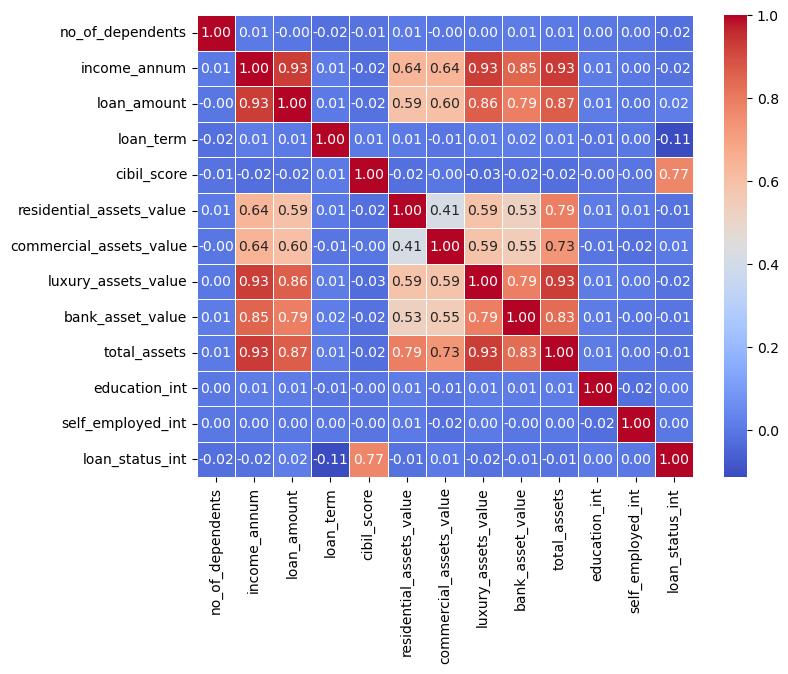

In [55]:
import seaborn as sns
df_except_col = df.drop(['education','self_employed','loan_status','loan_id'],axis = 1)
correlation_matrix = df_except_col.corr()
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [56]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Example: RandomForest model
X = df.drop(['loan_status_int','education','self_employed','loan_status','loan_id'],axis = 1)  # Features
y = df['loan_status_int']  # Target

# Train the Random Forest
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importance
importances = model.feature_importances_

In [57]:
importances

array([0.00672238, 0.01550401, 0.02821006, 0.05679465, 0.8168257 ,
       0.01405757, 0.01385381, 0.01497493, 0.01225269, 0.016673  ,
       0.00189007, 0.00224113])

In [58]:
importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)


In [59]:
importance_df

,feature,importance
4,cibil_score,0.816826
3,loan_term,0.056795
2,loan_amount,0.028210
9,total_assets,0.016673
1,income_annum,0.015504
7,luxury_assets_value,0.014975
5,residential_assets_value,0.014058
6,commercial_assets_value,0.013854
8,bank_asset_value,0.012253
0,no_of_dependents,0.006722


#### Building Models

In [86]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings

In [87]:
X = df.drop(['loan_status_int','education','self_employed','loan_status','loan_id'],axis = 1)  # Features
y = df['loan_status_int']  # Target

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [89]:
def evaluate_model(true, predicted):
    accuracyscore = accuracy_score(true, predicted)
    return accuracyscore

In [90]:
model_list = []
accuracy_list_train = []
accuracy_list_test = []
models = {
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
     #"XGBClassifier": XGBClassifier(),
    "CatBoosting Classifier": CatBoostClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Logistic Regression": LogisticRegression()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # Evaluate Train and Test dataset
    model_train_accuracy_score = evaluate_model(y_train, y_train_pred)
    model_test_accuracy_score  = evaluate_model(y_test, y_test_pred)
    print(model)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Train accuracy: {:.4f}".format(model_train_accuracy_score))


    print('---------------------------')
    print('Model performance for Test set')
    print("- Test accuracy: {:.4f}".format(model_test_accuracy_score))
    accuracy_list_train.append(model_train_accuracy_score)
    accuracy_list_test.append(model_test_accuracy_score)
    
    print('='*35)
    print('\n')

KNeighborsClassifier()
K-Neighbors Classifier
Model performance for Training set
- Train accuracy: 0.7265
---------------------------
Model performance for Test set
- Test accuracy: 0.5585


DecisionTreeClassifier()
Decision Tree
Model performance for Training set
- Train accuracy: 1.0000
---------------------------
Model performance for Test set
- Test accuracy: 0.9789


RandomForestClassifier()
Random Forest Classifier
Model performance for Training set
- Train accuracy: 1.0000
---------------------------
Model performance for Test set
- Test accuracy: 0.9813


Learning rate set to 0.017406
0:	learn: 0.6525829	total: 7.94ms	remaining: 7.93s
1:	learn: 0.6163505	total: 14.1ms	remaining: 7.05s
2:	learn: 0.5850881	total: 20.4ms	remaining: 6.78s
3:	learn: 0.5519563	total: 26.4ms	remaining: 6.56s
4:	learn: 0.5218154	total: 32.6ms	remaining: 6.49s
5:	learn: 0.4958288	total: 40.2ms	remaining: 6.66s
6:	learn: 0.4701747	total: 46.6ms	remaining: 6.61s
7:	learn: 0.4436020	total: 52.5ms	remaining

C:\Users\ramac\anaconda3\anaconda\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()
AdaBoost Classifier
Model performance for Training set
- Train accuracy: 0.9804
---------------------------
Model performance for Test set
- Test accuracy: 0.9696


LogisticRegression()
Logistic Regression
Model performance for Training set
- Train accuracy: 0.7318
---------------------------
Model performance for Test set
- Test accuracy: 0.7295




C:\Users\ramac\anaconda3\anaconda\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
pd.DataFrame(list(zip(model_list, accuracy_list_train, accuracy_list_test)), columns=['Model Name', 'accuracy_list_train','accuracy_list_test']).sort_values(by=["accuracy_list_test"],ascending=False)

,Model Name,accuracy_list_train,accuracy_list_test
2,Random Forest Classifier,1.000000,0.981265
1,Decision Tree,1.000000,0.978923
3,CatBoosting Classifier,1.000000,0.978923
4,AdaBoost Classifier,0.980381,0.969555
5,Logistic Regression,0.731772,0.729508
0,K-Neighbors Classifier,0.726501,0.558548


In [92]:
X = df.drop(['loan_status_int','education','self_employed','loan_status','loan_id','education_int','self_employed_int','no_of_dependents','bank_asset_value','commercial_assets_value','residential_assets_value','luxury_assets_value'],axis = 1)  # Features
y = df['loan_status_int']  # Target

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [94]:
model_list = []
accuracy_list_train = []
accuracy_list_test = []
models = {
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
     #"XGBClassifier": XGBClassifier(),
    "CatBoosting Classifier": CatBoostClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Logistic Regression": LogisticRegression()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # Evaluate Train and Test dataset
    model_train_accuracy_score = evaluate_model(y_train, y_train_pred)
    model_test_accuracy_score  = evaluate_model(y_test, y_test_pred)
    print(model)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Train accuracy: {:.4f}".format(model_train_accuracy_score))


    print('---------------------------')
    print('Model performance for Test set')
    print("- Test accuracy: {:.4f}".format(model_test_accuracy_score))
    accuracy_list_train.append(model_train_accuracy_score)
    accuracy_list_test.append(model_test_accuracy_score)
    
    print('='*35)
    print('\n')

KNeighborsClassifier()
K-Neighbors Classifier
Model performance for Training set
- Train accuracy: 0.7195
---------------------------
Model performance for Test set
- Test accuracy: 0.5656


DecisionTreeClassifier()
Decision Tree
Model performance for Training set
- Train accuracy: 1.0000
---------------------------
Model performance for Test set
- Test accuracy: 0.9789


RandomForestClassifier()
Random Forest Classifier
Model performance for Training set
- Train accuracy: 1.0000
---------------------------
Model performance for Test set
- Test accuracy: 0.9778


Learning rate set to 0.017406
0:	learn: 0.6506039	total: 5.11ms	remaining: 5.1s
1:	learn: 0.6151871	total: 9.8ms	remaining: 4.89s
2:	learn: 0.5803330	total: 14.5ms	remaining: 4.82s
3:	learn: 0.5453696	total: 19.3ms	remaining: 4.81s
4:	learn: 0.5158279	total: 23.6ms	remaining: 4.7s
5:	learn: 0.4881030	total: 28.3ms	remaining: 4.68s
6:	learn: 0.4627944	total: 32.8ms	remaining: 4.66s
7:	learn: 0.4359853	total: 37.5ms	remaining: 4

C:\Users\ramac\anaconda3\anaconda\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()
AdaBoost Classifier
Model performance for Training set
- Train accuracy: 0.9804
---------------------------
Model performance for Test set
- Test accuracy: 0.9696


LogisticRegression()
Logistic Regression
Model performance for Training set
- Train accuracy: 0.8100
---------------------------
Model performance for Test set
- Test accuracy: 0.8150




In [95]:
pd.DataFrame(list(zip(model_list, accuracy_list_train, accuracy_list_test)), columns=['Model Name', 'accuracy_list_train','accuracy_list_test']).sort_values(by=["accuracy_list_test"],ascending=False)

,Model Name,accuracy_list_train,accuracy_list_test
1,Decision Tree,1.000000,0.978923
2,Random Forest Classifier,1.000000,0.977752
3,CatBoosting Classifier,1.000000,0.977752
4,AdaBoost Classifier,0.980381,0.969555
5,Logistic Regression,0.809956,0.814988
0,K-Neighbors Classifier,0.719473,0.565574
